In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

from tensorflow.keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM

## Utility functions used in the notebook

In [2]:
def rbm_gibbs_sample_image(rbm, im, steps):
  assert len(im.shape) < 3
  if len(im.shape) == 2:
    rows = im.shape[0]
    cols = im.shape[1]
    im = im.reshape((-1))
  else:
    im = im.copy()
  for _ in range(steps):
    im = rbm.gibbs(im)
  if rows is not None and cols is not None:
    im = im.reshape((rows, cols))
  return im.astype('float32')
    
def image_palette(X, nr = 0, m = 20):
  if nr is 0:
    nr = X.shape[0]
  return np.rollaxis(np.rollaxis(X[0:nr].reshape(m, -1, 28, 28), 0, 2), 1, 3).reshape(-1, m * 28)

def remove_rows(X, start, end):
  X = X.copy()
  if len(X.shape) == 2:
    X[start:end] = 0
  elif len(X.shape) == 3:
    X[:,start:end] = 0
  return X

## Load and show the mnist data

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test = X_test[0:100]

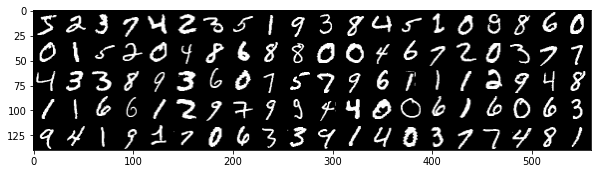

In [4]:
flattened_images = image_palette(X_train, 100)
plt.figure(figsize=(10,20))
plt.imshow(flattened_images)

## Train the RBM
**Exercise** What is the effect of the different parameters: **n_components**, **learning_rate**, **n_iter**. These parameters are, respectively, the number of components (the number of binary hidden units), the learning rate and the number of iterations. <br/>
Evaluate the performance visually in the next code cell.


Possible methods of the BernoulliRBM sklearn method are (see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html)  : 

- fit(X[, y])  - Fit the model to the data X.
- fit_transform(X[, y]) - Fit to data, then transform it.
- get_params([deep]) - Get parameters for this estimator.
- gibbs(v) - Perform one Gibbs sampling step.
- partial_fit(X[, y]) - Fit the model to the partial segment of the data X.
- score_samples(X) - Compute the pseudo-likelihood of X.
- set_params(**params) - Set the parameters of this estimator.
- transform(X) - Compute the hidden layer activation probabilities, P(h=1|v=X).

### Effect of n_components

In [37]:
pseudo_likelihoods = list()
for i in [1,10,20,30,40,50,60,70,80,90,100]:
    rbm = BernoulliRBM(n_components=i, learning_rate=0.01, random_state=0, n_iter=20, verbose=True)
    rbm.fit(X_train)
    # score_samples(X) - Compute the pseudo-likelihood of X (for all data points)
    # we take the mean 
    pseudo_likelihoods.append(np.mean(rbm.score_samples(X_train)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.17, time = 0.94s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -191.35, time = 1.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -189.92, time = 1.03s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -187.81, time = 1.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -187.97, time = 1.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -186.28, time = 1.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -185.84, time = 1.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -185.45, time = 1.03s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -186.04, time = 1.02s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -184.93, time = 1.04s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -185.16, time = 1.01s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -185.26, time = 1.01s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -186.12, time = 1.05s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -184.48, time = 1.00s
[BernoulliRBM] 

[BernoulliRBM] Iteration 18, pseudo-likelihood = -94.93, time = 4.33s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -94.32, time = 4.34s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -95.56, time = 4.35s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -130.21, time = 4.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -115.49, time = 4.43s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -108.57, time = 4.41s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -104.89, time = 4.44s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -100.55, time = 4.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -98.67, time = 4.42s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -96.55, time = 4.42s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -95.81, time = 4.43s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -93.64, time = 4.43s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -92.77, time = 4.43s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -91.79, time = 4.41s
[BernoulliRBM] Iteration

In [38]:
print(pseudo_likelihoods)

[-184.0711377193229, -178.94300011135016, -136.3916206502607, -113.25247865636425, -106.370124724875, -95.56117193675634, -88.78460656892518, -84.93392753291765, -82.80523814596685, -78.67785635480514, -76.27556888247958]


In [64]:
# #to avoid re-running the above training (which takes time), the results found were : 

# pseudo_likelihoods = [-184.0711377193229, -178.94300011135016, -136.3916206502607, 
#                       -113.25247865636425, -106.370124724875, -95.56117193675634, 
#                       -88.78460656892518, -84.93392753291765, -82.80523814596685, -78.67785635480514, -76.27556888247958]
# #for : 

# number_of_components = [1,10,20,30,40,50,60,70,80,90,100]


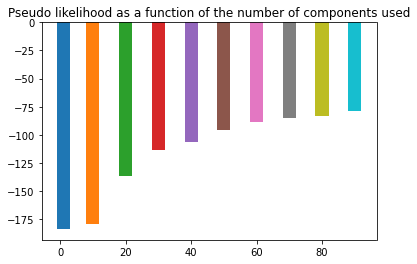

In [65]:
import matplotlib.pyplot as plt

number_of_components = [1,10,20,30,40,50,60,70,80,90,100]
for i in range(0,len(pseudo_likelihoods)-1):
    plt.bar(number_of_components[i],pseudo_likelihoods[i],width = 4)
    plt.title("Pseudo likelihood as a function of the number of components used")
    plt.savefig("figures_report/likelihood_vs_nb_component.png",dpi=600)

### Effect of number of iteration

In [58]:
pseudo_likelihoods = list()
for i in [1,10,20,30,40,50,60,70,80,90,100]:
    rbm = BernoulliRBM(n_components=50, learning_rate=0.01, random_state=0, n_iter=i, verbose=True)
    rbm.fit(X_train)
    # score_samples(X) - Compute the pseudo-likelihood of X (for all data points)
    # we take the mean 
    pseudo_likelihoods.append(np.mean(rbm.score_samples(X_train)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.56, time = 3.95s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.56, time = 3.96s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -123.49, time = 4.30s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -115.92, time = 4.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -111.49, time = 4.34s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -107.06, time = 4.34s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -104.11, time = 4.34s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -102.38, time = 4.34s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -101.21, time = 4.44s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -100.29, time = 4.55s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -99.07, time = 4.53s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.56, time = 4.07s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -123.49, time = 4.35s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -115.92, time = 4.34s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 18, pseudo-likelihood = -94.93, time = 4.57s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -94.32, time = 4.57s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -95.56, time = 4.67s
[BernoulliRBM] Iteration 21, pseudo-likelihood = -95.48, time = 4.41s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -94.09, time = 4.36s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -93.65, time = 4.35s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -94.36, time = 4.35s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -94.65, time = 4.35s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -93.15, time = 4.35s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -93.96, time = 4.35s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -93.19, time = 4.34s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -93.48, time = 4.35s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -92.68, time = 4.35s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -92.09, time = 4.35s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 26, pseudo-likelihood = -93.15, time = 4.34s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -93.96, time = 4.36s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -93.19, time = 4.34s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -93.48, time = 4.35s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -92.68, time = 4.34s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -92.09, time = 4.34s
[BernoulliRBM] Iteration 32, pseudo-likelihood = -93.17, time = 4.34s
[BernoulliRBM] Iteration 33, pseudo-likelihood = -92.52, time = 4.34s
[BernoulliRBM] Iteration 34, pseudo-likelihood = -94.43, time = 4.36s
[BernoulliRBM] Iteration 35, pseudo-likelihood = -92.70, time = 4.35s
[BernoulliRBM] Iteration 36, pseudo-likelihood = -93.07, time = 4.35s
[BernoulliRBM] Iteration 37, pseudo-likelihood = -91.95, time = 4.34s
[BernoulliRBM] Iteration 38, pseudo-likelihood = -92.80, time = 4.36s
[BernoulliRBM] Iteration 39, pseudo-likelihood = -92.13, time = 4.36s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 74, pseudo-likelihood = -90.93, time = 4.36s
[BernoulliRBM] Iteration 75, pseudo-likelihood = -90.69, time = 4.37s
[BernoulliRBM] Iteration 76, pseudo-likelihood = -93.57, time = 4.36s
[BernoulliRBM] Iteration 77, pseudo-likelihood = -91.18, time = 4.34s
[BernoulliRBM] Iteration 78, pseudo-likelihood = -92.18, time = 4.36s
[BernoulliRBM] Iteration 79, pseudo-likelihood = -92.09, time = 4.36s
[BernoulliRBM] Iteration 80, pseudo-likelihood = -91.95, time = 4.36s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.56, time = 3.98s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -123.49, time = 4.34s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -115.92, time = 4.34s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -111.49, time = 4.50s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -107.06, time = 4.53s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -104.11, time = 4.55s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -102.38, time = 4.43s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 22, pseudo-likelihood = -94.09, time = 4.34s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -93.65, time = 4.35s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -94.36, time = 4.57s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -94.65, time = 4.52s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -93.15, time = 4.51s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -93.96, time = 4.37s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -93.19, time = 4.34s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -93.48, time = 4.35s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -92.68, time = 4.34s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -92.09, time = 4.34s
[BernoulliRBM] Iteration 32, pseudo-likelihood = -93.17, time = 4.34s
[BernoulliRBM] Iteration 33, pseudo-likelihood = -92.52, time = 4.34s
[BernoulliRBM] Iteration 34, pseudo-likelihood = -94.43, time = 4.33s
[BernoulliRBM] Iteration 35, pseudo-likelihood = -92.70, time = 4.34s
[BernoulliRBM] Itera

In [60]:
print(pseudo_likelihoods)

[-141.55743793543542, -99.06554037332329, -95.56117193675634, -92.67728820403694, -92.05498591096642, -91.74053338282047, -91.43724015118823, -90.5277586152201, -91.94759542229995, -91.97949525101954, -91.53376491061867]


In [ ]:
# #to avoid re-running the above training (which takes time), the results found were : 

# pseudo_likelihoods = [-141.55743793543542, -99.06554037332329, -95.56117193675634, -92.67728820403694, -92.05498591096642,
#                      -91.74053338282047, -91.43724015118823, -90.5277586152201, -91.94759542229995, -91.97949525101954, 
#                        -91.53376491061867]



# #for : 

# number_of_iterations = [1,10,20,30,40,50,60,70,80,90,100]


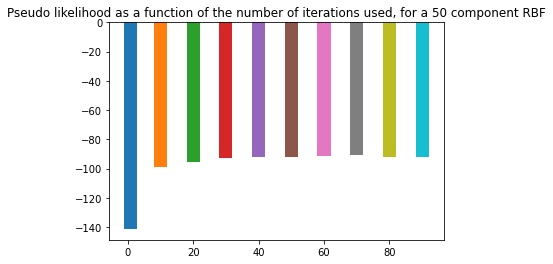

In [62]:
number_of_iterations = [1,10,20,30,40,50,60,70,80,90,100]

for i in range(0,len(pseudo_likelihoods)-1):
    plt.bar(number_of_iterations[i],pseudo_likelihoods[i],width = 4)
    plt.title("Pseudo likelihood as a function of the number of iterations used, for a 50 component RBF")
    plt.savefig("figures_report/likelihood_vs_nb_iteration.png",dpi=600)

## Sample the trained RBM and show the result
The gibbs_steps variable determines how many Gibbs sampling steps will be performed for each test image i.e. with the test images as initialization. <br/>
**Exercise** Try different values and observe the result. Can you explain the result? <br/>
Compare the result with the original test images, shown one cell lower.


Let's compare that for different gibbs_step values, for 2 networks : one with 5 components, and one with 50. We run the training for 30 iterations (as we have seen in previous step, pseudo likelihood does not improve after 20 epoch for the 50 component network)

In [83]:
rbm_50 = BernoulliRBM(n_components=50, learning_rate=0.01, random_state=0, n_iter=20, verbose=True)
rbm_50.fit(X_train)

rbm_5 = BernoulliRBM(n_components=5, learning_rate=0.01, random_state=0, n_iter=20, verbose=True)
rbm_5.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.56, time = 3.95s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -123.49, time = 4.32s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -115.92, time = 4.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -111.49, time = 4.34s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -107.06, time = 4.35s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -104.11, time = 4.35s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -102.38, time = 4.34s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -101.21, time = 4.34s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -100.29, time = 4.35s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -99.07, time = 4.50s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -98.31, time = 4.61s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -97.91, time = 4.55s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -96.40, time = 4.42s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -96.91, time = 4.38s
[BernoulliRBM] Itera

BernoulliRBM(learning_rate=0.01, n_components=5, n_iter=20, random_state=0,
             verbose=True)

In [92]:
gibbs_steps_list = [1,5,10,20]
print(len(gibbs_steps_list))

4


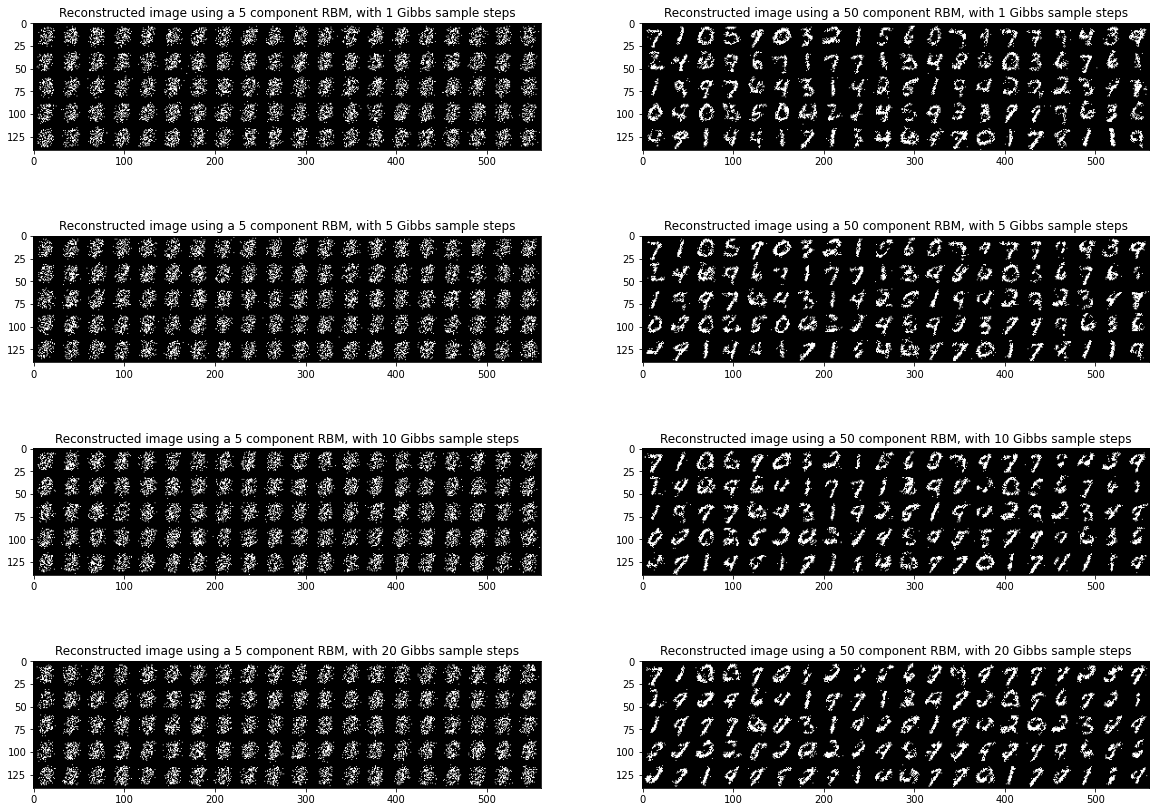

In [103]:
fig, axs = plt.subplots(4,2,figsize=(20,15))

gibbs_steps_list = [1,5,10,20]
a_rbm_5 = X_test.copy()
a_rbm_50 = X_test.copy()

for m in range(0,len(gibbs_steps_list)):
    for i in range(X_test.shape[0]):
        for j in range(gibbs_steps_list[m]):
            a_rbm_5[i] = rbm_5.gibbs(a_rbm_5[i])
            a_rbm_50[i] = rbm_50.gibbs(a_rbm_50[i])
    axs[m,0].imshow(image_palette(a_rbm_5))
    axs[m,0].set_title("Reconstructed image using a 5 component RBM, with " + str(gibbs_steps_list[m]) +" Gibbs sample steps" )
    axs[m,1].imshow(image_palette(a_rbm_50))
    axs[m,1].set_title("Reconstructed image using a 50 component RBM, with " + str(gibbs_steps_list[m]) +" Gibbs sample steps" )
    
plt.savefig("figures_report/reconstruction_vs_gibbs",dpi=600)


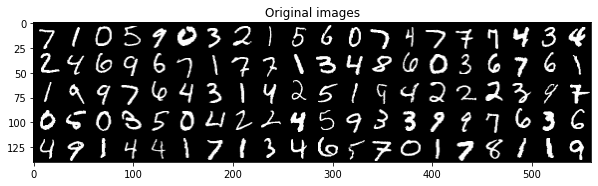

In [105]:
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test))
plt.title("Original images")
plt.savefig("figures_report/original_images",dpi=600)


## Reconstruction of unseen images
In this cell, we will remove pixel rows from certain images. Using the recently trained RBM, we will then try to reconstruct the original images.  <br/>
The following variables control this process: <br/>


*   **reconstruction_gibbs_steps**: The number of gibbs steps used to reconstruct the image.
*   **start_test_index**: The first index of the test set to use.
*   **nr**: the number of images starting from **start_test_index** to reconstruct.
*   **start_row_to_remove**:  The index of the first row that should be removed.
*   **end_row_to_remove**: The index up to which the rows should be removed.

**Exercise** Adjust these variables and observe the result of the reconstruction in the shown image.
What is the role of the previously seen RBM hyperparameters on the reconstruction? <br/>
How many rows can you remove such that reconstruction is still possible? <br/>
In the next code cell, the removed rows will be replaced by the reconstructed rows.




In [83]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, n_iter=20, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.85, time = 4.70s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.32, time = 5.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.52, time = 5.35s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.07, time = 5.18s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.96, time = 5.15s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.83, time = 5.16s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.23, time = 5.15s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.30, time = 5.28s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -79.48, time = 5.18s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -80.15, time = 5.16s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -79.91, time = 5.23s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.32, time = 5.20s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -78.59, time = 5.17s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -78.37, time = 5.16s
[BernoulliRBM] Iteration 15,

BernoulliRBM(learning_rate=0.01, n_components=100, n_iter=20, random_state=0,
             verbose=True)

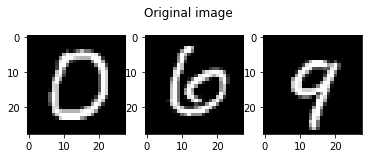

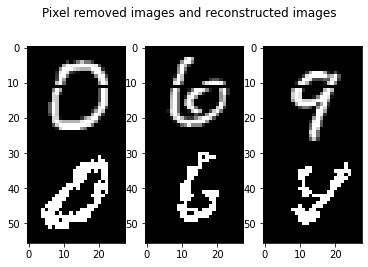

In [73]:
reconstruction_gibbs_steps = 30
start_test_index = 10
nr = 3
start_row_to_remove = 11
end_row_to_remove = 12
to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(2,nr,i+1)
  ax1.imshow((X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))[i]))
plt.suptitle("Original image")
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])
plt.suptitle("Pixel removed images and reconstructed images")
plt.savefig("figures_report/rbm_100_gibbs_30_start_11_end_12",dpi=600)
plt.show()

### Same but with a simpler RBM

In [75]:
rbm = BernoulliRBM(n_components=20, learning_rate=0.01, random_state=0, n_iter=20, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -198.55, time = 1.42s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -190.75, time = 1.68s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -183.00, time = 1.68s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -171.66, time = 1.69s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -166.66, time = 1.67s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -165.29, time = 1.67s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -160.08, time = 1.65s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -157.99, time = 1.67s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -149.41, time = 1.66s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -146.18, time = 1.68s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -146.12, time = 1.67s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -144.43, time = 1.69s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -142.90, time = 1.69s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -141.35, time = 1.68s
[BernoulliRBM] 

BernoulliRBM(learning_rate=0.01, n_components=20, n_iter=20, random_state=0,
             verbose=True)

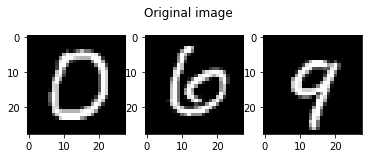

In [82]:
reconstruction_gibbs_steps = 30
start_test_index = 10
nr = 3
start_row_to_remove = 11
end_row_to_remove = 12
to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(2,nr,i+1)
  ax1.imshow((X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))[i]))
plt.suptitle("Original image")
fig = plt.figure()
plt.savefig("figures_report/origina_069",dpi=600)
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])
plt.suptitle("Pixel removed images and reconstructed images")
plt.savefig("figures_report/rbm_20_gibbs_30_start_11_end_12",dpi=600)
plt.show()

## Component visualisation
In the final cell, the components (weights of each neuron) of the RBM are shown.<br/> 
Observing these components (think back to CNNs) may offer insights into the trained model.

C:\Users\deniz\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """


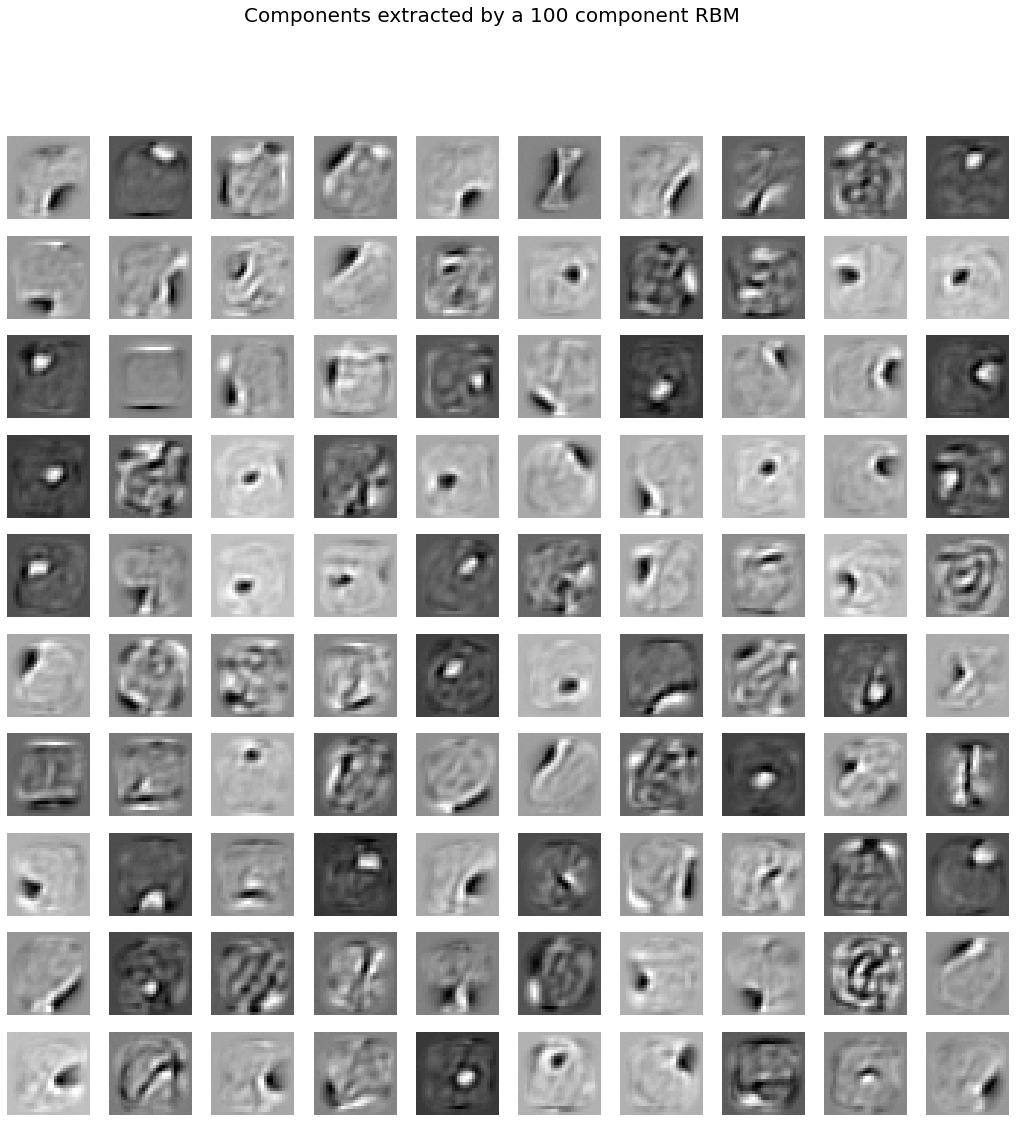

In [85]:
plt.figure(figsize=(18, 18))
nr_components = rbm.components_.shape[0]
for i in range(nr_components):
    c = rbm.components_[i]
    plt.subplot(10, np.ceil(nr_components/10), i + 1)
    plt.imshow(c.reshape((28, 28)), cmap = "gray", interpolation='nearest')
    plt.axis('off')

plt.suptitle('Components extracted by a 100 component RBM', fontsize=20)
plt.savefig("figures_report/component_100_rbm",dpi=600)
plt.show()